<div class="alert alert-block alert-success">
    <h1 align="center">MACHINE LEARNING CAN PREDICT SURVIVAL OF PATIENTS WITH HEART FAILURE FROM SERUM CREATININE AND EJECTION FRACTION ALONE</h1>

</div>


This is paper take from BMC:https://bmcmedinformdecismak.biomedcentral.com/

## **BACKGROUND**

**Cardiovascular diseases** kill approximately 17 million people globally every year, and they mainly
exhibit as myocardial infarctions and heart failures. Heart failure (HF) occurs when the heart cannot pump enough
blood to meet the needs of the body.

Available electronic medical records of patients quantify symptoms, body features, and clinical laboratory test values,
which can be used to perform biostatistics analysis aimed at highlighting patterns and correlations otherwise
undetectable by medical doctors. 

Machine learning, in particular, can predict patients’ survival from their data and can
individuate the most important features among those included in their medical records.

## **METHODS**

In this paper, we analyze a dataset of 299 patients with heart failure collected in 2015. We apply several
machine learning classifiers to both predict the patients survival, and rank the features corresponding to the most
important risk factors. 

We also perform an alternative feature ranking analysis by employing traditional biostatistics
tests, and compare these results with those provided by the machine learning algorithms. 

Since both feature ranking approaches clearly identify **serum creatinine** and **ejection fraction** as the two most relevant features, we then build the machine learning survival prediction models on these two factors alone.

## **RESULTS**

Our results of these two-feature models show not only that **serum creatinine** and **ejection fraction** are
sufficient to predict survival of heart failure patients from medical records, but also that using these *two features alone
can lead to more accurate predictions than using the original dataset features in its entirety*. We also carry out an
analysis including the follow-up month of each patient: even in this case, **serum creatinine** and **ejection fraction** *are
the most predictive clinical features of the dataset, and are sufficient to predict patients’ survival*.


## **KEYWORDS**

#### **CARDIOVASCULAR HEART DISEASES**

Cardiovascular disease(CVD) is a class of diseases that involve the heart or blood vessels. CVD includes **coronary artery diseases(CAD)** such as **angina** and **myocardial infarction**(commonly known as a heart attack).
Other CVDs include
   * Stroke
   * Heart Failure
   * Hypertensive Heart Disease
   * Rheumatic Heart Disease.
   * Cardiomyopathy.
   * Abnormal Heart Rhythms.
   * Congenital Heart Disease.
   * Valvular Heart Disease.
   * Carditis.
   * Aortic aneurysms.
   * Peripheral Artery Disease.
   * Thromboembolic Disease.
   * Venous Thrombosis.

### **HEART FAILURE**

Heart failure (HF), also known as **congestive heart failure (CHF)** and **congestive cardiac failure (CCF)**, is a set of manifestations caused by the failure of the heart's function as a pump supporting the blood flow through the body; its signs and symptoms result from a structural and/or functional abnormality of the heart, that disrupts its filling with blood or its ejecting of it during each heart beat.

Signs and symptoms of heart failure commonly include shortness of breath, excessive tiredness, and leg swelling. The shortness of breath is usually worse with exercise or while lying down, and may wake the person at night.A limited ability to exercise is also a common feature.Chest pain, including angina, does not typically occur due to heart failure

### **SERUM CREATININE**

Diagnostic **serum creatinine** studies are used to determine renal function.The reference interval is 0.6–1.3 mg/dL (53–115 μmol/L).Measuring serum creatinine is a simple test, and it is the most commonly used indicator of renal function.

A rise in blood creatinine concentration is a late marker, observed only with marked damage to functioning **nephrons**. 

Therefore, this test is unsuitable for detecting early-stage kidney disease. A better estimation of kidney function is given by calculating the *estimated glomerular filtration rate (eGFR)*. eGFR can be accurately calculated without a 24-hour urine collection using serum creatinine concentration and some or all of the following variables: sex, age, weight, and race, as suggested by the American Diabetes Association. Many laboratories will automatically calculate eGFR when a creatinine test is requested.

**NOTE: The original dataset article unfortunately
does not indicate if any patient had primary kidney disease, and provides no additional information about what
type of follow-up was carried out.**

### **EJECTION FRACTIOIN**

An ejection fraction (EF) is the volumetric fraction (or portion of the total) of fluid (usually blood) ejected from a chamber (usually the heart) with each contraction (or heartbeat). Thus understood, ejection fraction may be used to measure a fluid of any viscosity discharged from a hollow organ to another cavity or outside of the body. Blood, bile and urine are commonly studied under this mathematical platform. 

For example, it may refer to the cardiac *atrium*, *ventricle*,*gall bladder*, or *leg veins*,although if unspecified it usually refers to the left ventricle of the heart. 

**EF is widely used as a measure of the pumping efficiency of the heart and is used to classify heart failure types. It is also used as an indicator of the severity of heart failure, although it has recognized limitations**.

The EF of the left heart, known as the **left ventricular ejection fraction (LVEF)**, is calculated by dividing the volume of blood pumped from the left ventricle per beat (stroke volume) by the volume of blood collected in the left ventricle at the end of diastolic filling (end-diastolic volume). LVEF is an indicator of the effectiveness of pumping into the systemic circulation. 

The EF of the right heart, or **right ventricular ejection fraction (RVEF)**, is a measure of the efficiency of pumping into the pulmonary circulation. A heart which cannot pump sufficient blood to meet the body's requirements (i.e., heart failure) will often, but not invariably, have a reduced ventricular ejection fraction.



## Import Libraries

In [127]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

# import tensorflow
import tensorflow as tf
from tensorflow.keras import layers,Sequential
from tensorflow.keras.layers import Dense

# train and test split
from sklearn.model_selection import train_test_split

# modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import OneRClassifier

# metrics
from sklearn.metrics import accuracy_score, f1_score,precision_score,recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix

# feature selection 
from sklearn.feature_selection import SelectFromModel

# feature ranking
from scipy.stats import mannwhitneyu
from scipy.stats import pearsonr
from scipy.stats import chisquare
from scipy.stats import shapiro


## Import Dataset
We analyzed a dataset containing the medical records of
299 heart failure patients collected at the Faisalabad Institute of Cardiology and at the Allied Hospital in Faisalabad
(Punjab, Pakistan), during April–December 2015 
The patients consisted of 105 women and 194 men, and
their ages range between 40 and 95 years old 

### Data Description
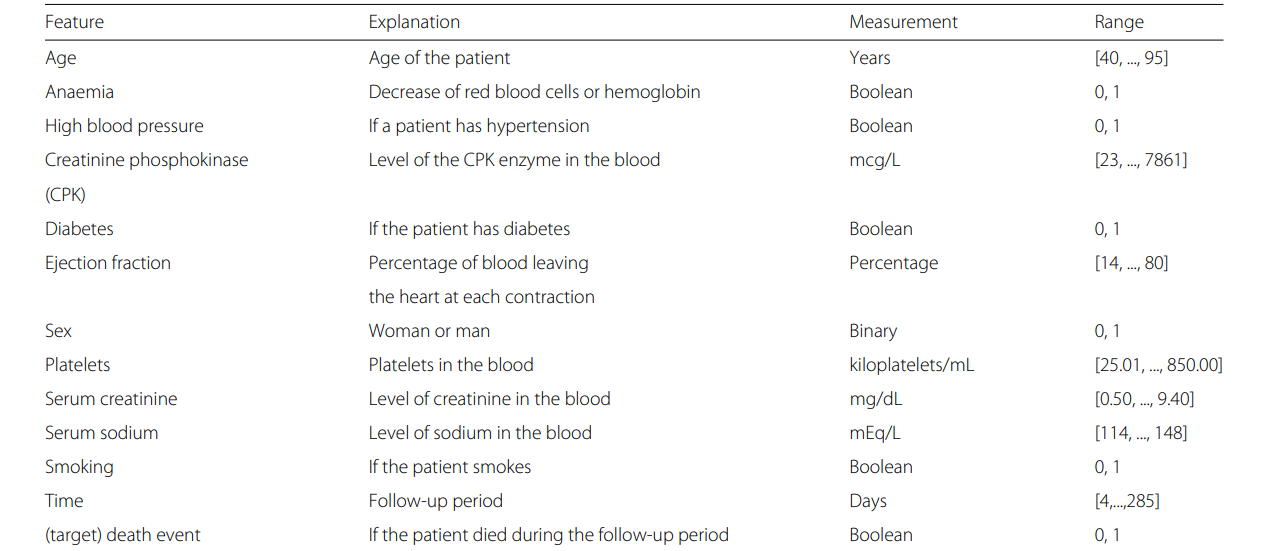

**NOTE:**
* Regarding the features, the creatinine phosphokinase(CPK) states the level of the CPK enzyme in blood . When a muscle tissue gets damaged, CPK flows into the blood. Therefore, high levels of CPK in the blood of a patient might indicate a heart failure or injury.
* The ejection fraction states the percentage of how much blood the left ventricle pumps out with each contraction.
* The serum creatinine is a waste product generated by creatine, when a muscle breaks down. Especially, doctors focus on serum creatinine in blood to check kidney function. If a patient has high levels of serum creatinine, it may indicate renal dysfunction 

**Statistical quantitative description of the category features**



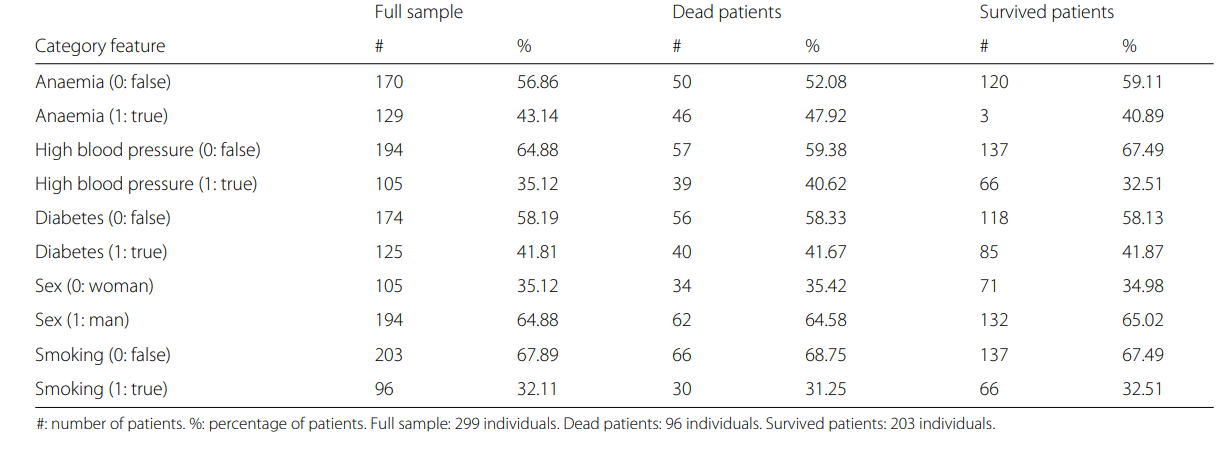

**Statistical quantitative description of the numeric features**
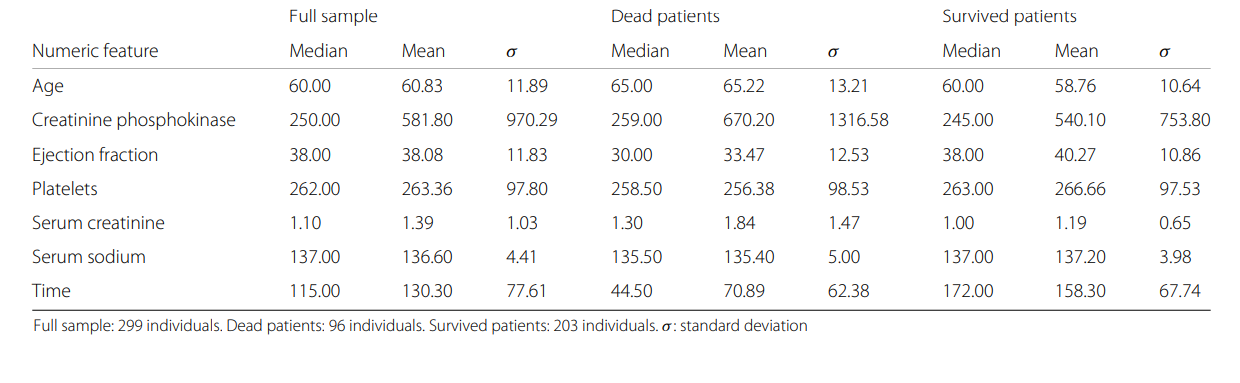

In [128]:
df = pd.read_csv("Dataset/heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [129]:
df.shape

(299, 13)

In [130]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


All columns are in all in numerical dtype and there are no missing values in the dataset

In [132]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Exploratory Data Analysis

0    203
1     96
Name: DEATH_EVENT, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


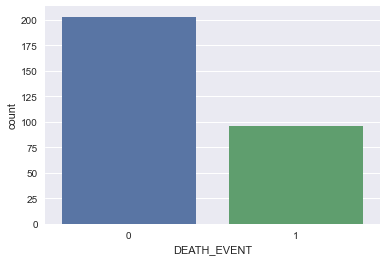

In [133]:
print(df['DEATH_EVENT'].value_counts())
print()
print(sns.countplot(x='DEATH_EVENT', data=df))
plt.show()

Clearly, we can see that our dataset is imbalance

Patient Survived is represent as '0'

Patient not survived is represented as '1'

Text(0, 0.5, 'creatinine_phosphokinase')

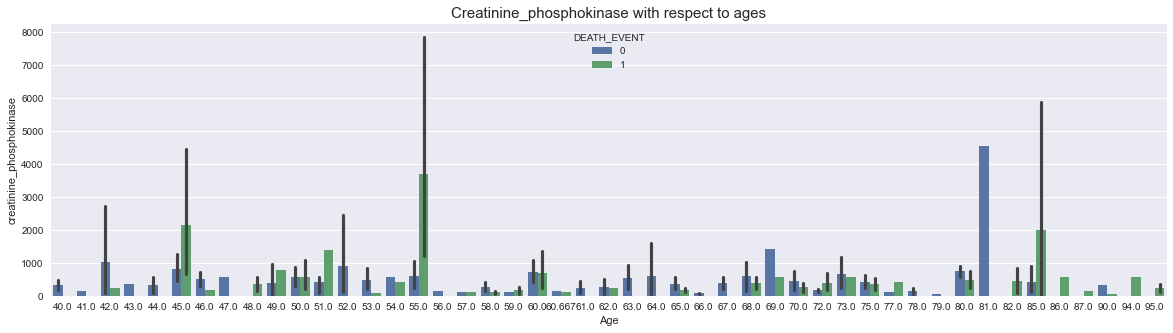

In [134]:
plt.figure(figsize=(20,5))
sns.barplot(x='age',y='creatinine_phosphokinase',data=df,hue='DEATH_EVENT')
plt.title("Creatinine_phosphokinase with respect to ages", fontsize=15)
plt.xlabel("Age")
plt.ylabel("creatinine_phosphokinase")

<Figure size 720x720 with 0 Axes>

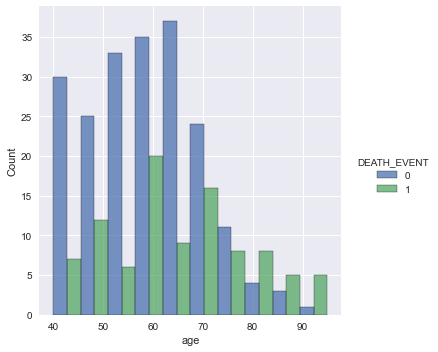

In [135]:
plt.figure(figsize=(10,10))
sns.displot(x='age',data=df,hue='DEATH_EVENT',multiple='dodge')
plt.show();

<AxesSubplot:xlabel='age', ylabel='Density'>

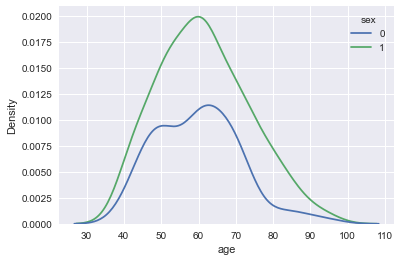

In [136]:
sns.kdeplot(x='age',data=df,hue='sex' )

<AxesSubplot:xlabel='sex', ylabel='count'>

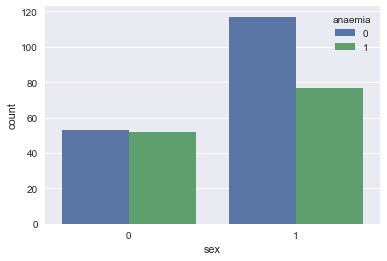

In [137]:
sns.countplot(x='sex', data=df,hue='anaemia')

Text(0, 0.5, 'Age')

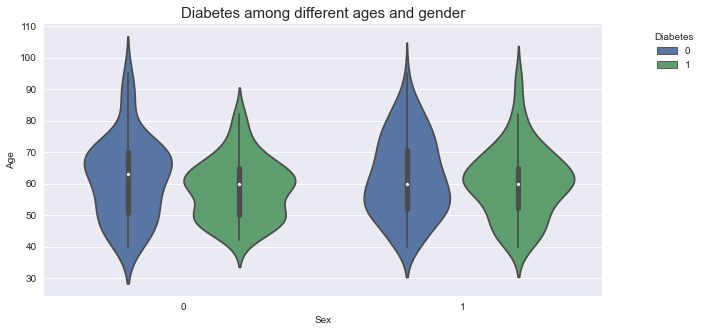

In [138]:
plt.figure(figsize=(10,5))
sns.violinplot(x='sex',y='age',data=df,hue='diabetes')
plt.title("Diabetes among different ages and gender",fontsize=15)
plt.legend(bbox_to_anchor=(1.18,1.0),title='Diabetes')
plt.xlabel("Sex",fontsize=10)
plt.ylabel("Age",fontsize=10)



Text(26.25598958333334, 0.5, 'Age')

<Figure size 720x360 with 0 Axes>

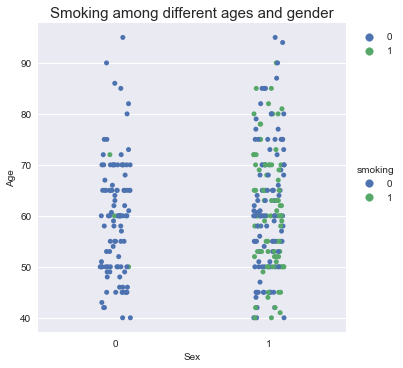

In [139]:
plt.figure(figsize=(10,5))
sns.catplot(x='sex',y='age',data=df,hue='smoking')
plt.title("Smoking among different ages and gender",fontsize=15)
plt.legend(bbox_to_anchor=(1.18,1.0))
plt.xlabel("Sex",fontsize=10)
plt.ylabel("Age",fontsize=10)


Text(0, 0.5, 'platelets')

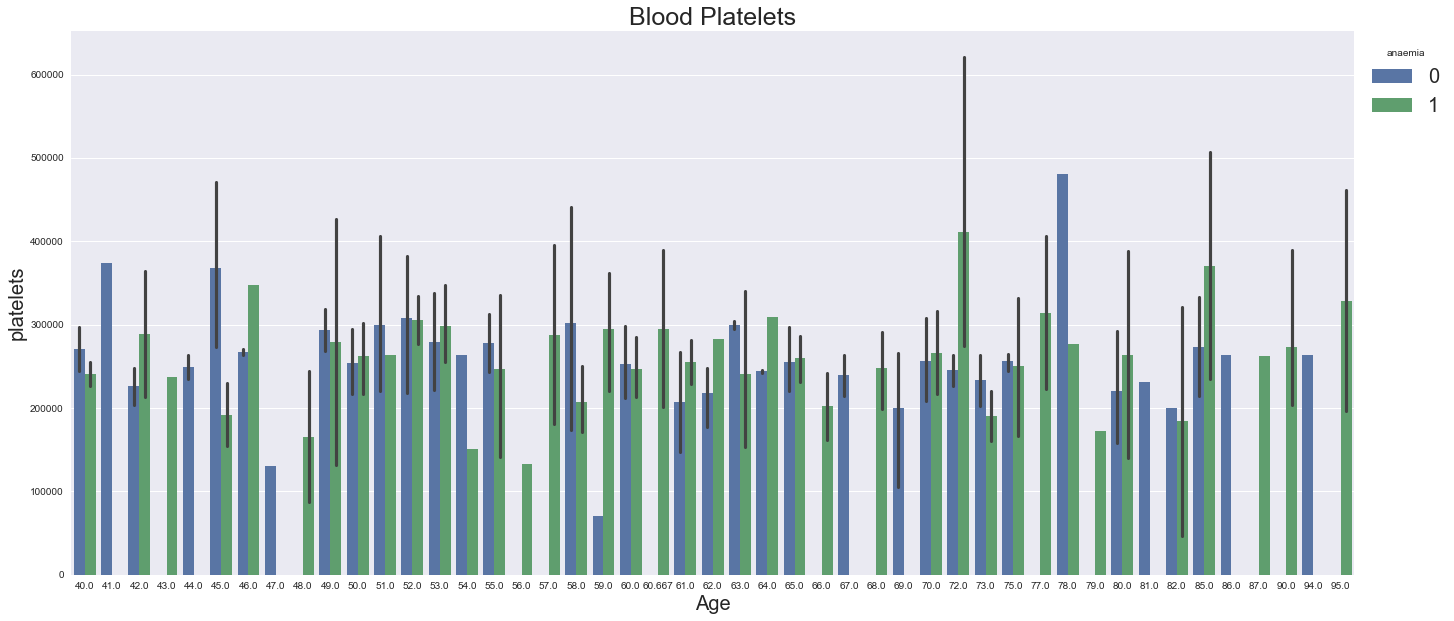

In [140]:
plt.figure(figsize=(23,10))
sns.barplot(x='age',y='platelets',data=df,hue='anaemia')
plt.title("Blood Platelets",fontsize=25)
plt.legend(bbox_to_anchor=(1.08,1.0),title='anaemia',fontsize=20)
plt.xlabel("Age",fontsize=20)
plt.ylabel("platelets",fontsize=20)

Text(0.5, 1.0, 'Ejection Fraction Versus Serum_Creatinine')

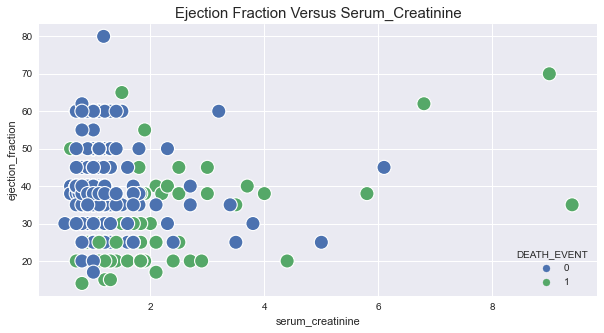

In [141]:

plt.figure(figsize=(10,5))
plt.style.use("seaborn")
sns.scatterplot(y='ejection_fraction',x='serum_creatinine',data=df,s=200,hue='DEATH_EVENT')
plt.title("Ejection Fraction Versus Serum_Creatinine",fontsize=15)


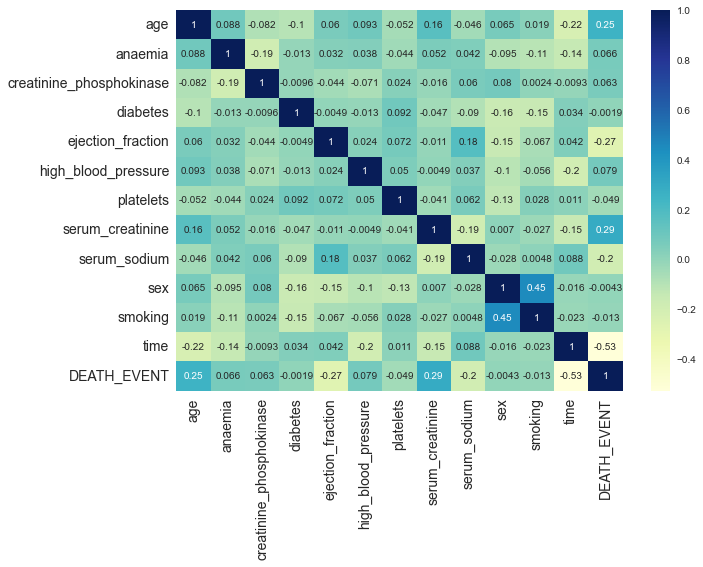

In [142]:
# Correlation
df_corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(df_corr,
           annot=True,
           cmap='YlGnBu')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show();

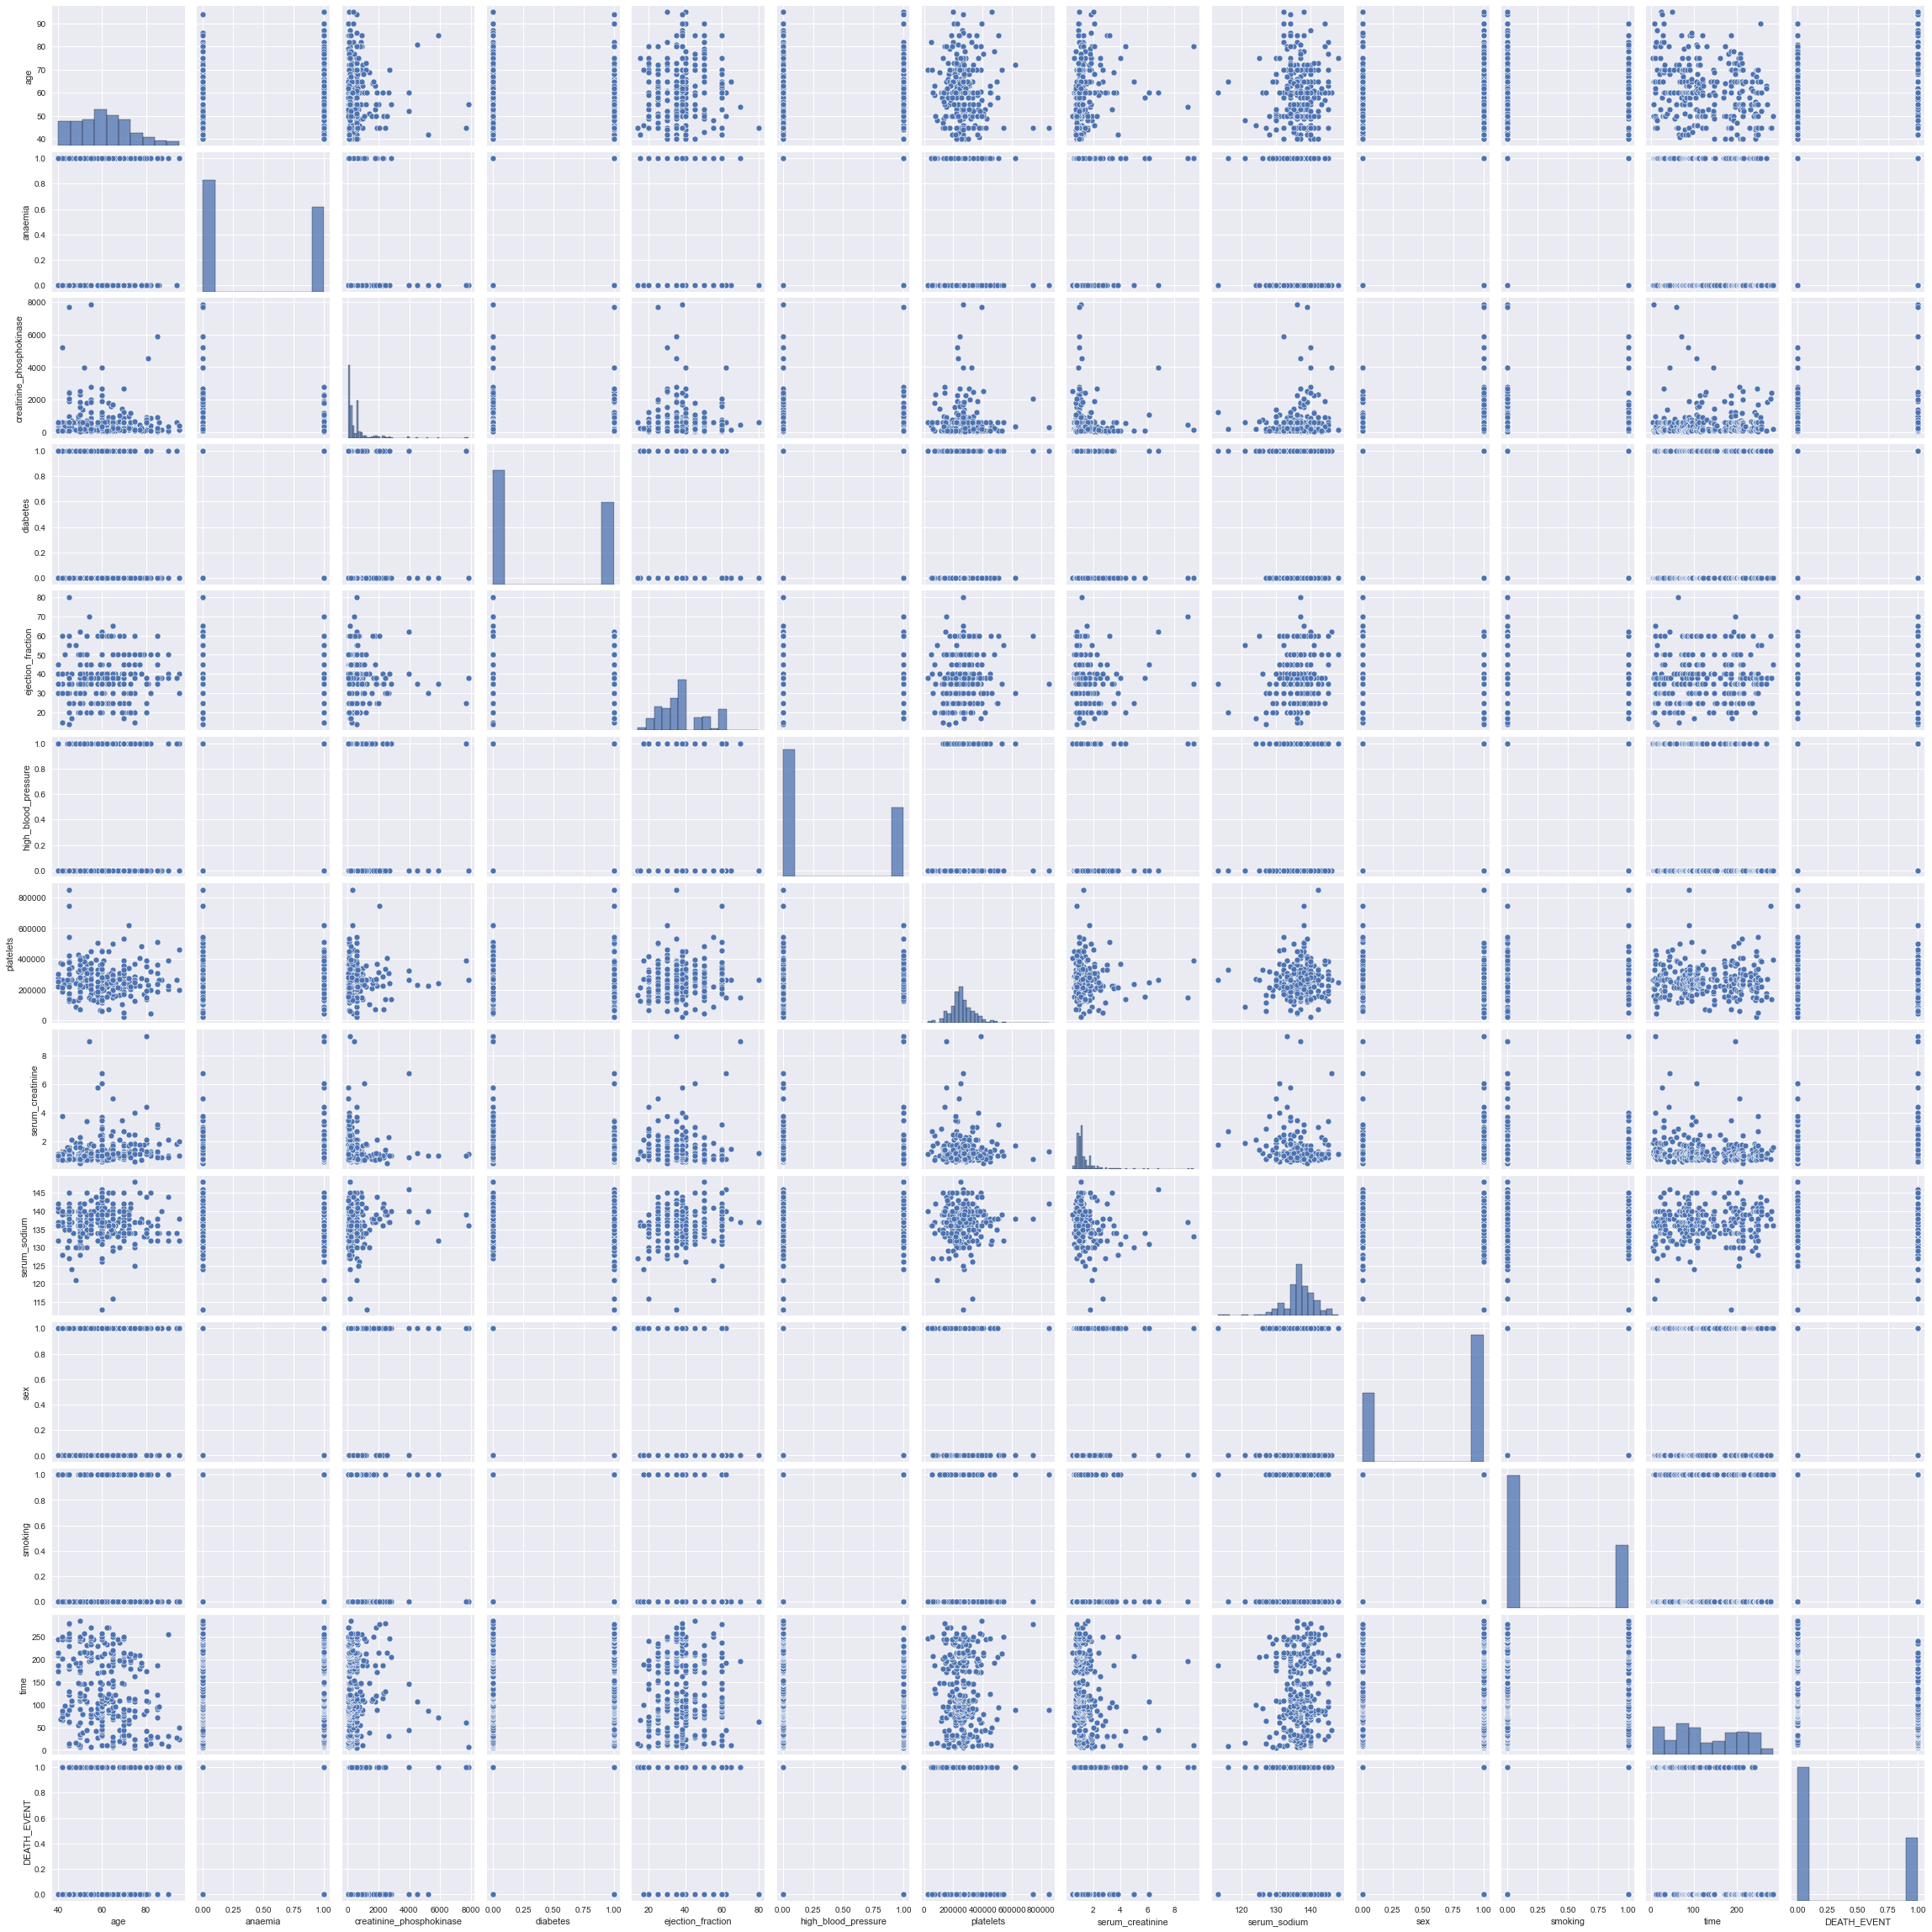

In [143]:
sns.pairplot(df)

## Methods

The methods we gonna use

1. Machine Learning methods we used for the binary classification**(Survival prediction Classifier)**.
2. Biostatistics and machine learning methods we employed for the feature ranking, discarding each patients' follow-up time **(Feature ranking)**.
3. Survival machine learning prediction on **serum creatinine and ejection fraction alone**


### **Survival prediction classifiers**

This part of our analysis focuses on the binary prediction of the survival of the patients in the follow-up period.

To predict patients survival, we employed ten different methods from different machine learning areas.

The classifiers include 

* One linear statistical method(Linear Regression).
* Three tree-based methods (Random Forests, One Rule, Decision Tree).
* One Artificial Neural Network (perceptron).
* Two Support Vector Machines (Linear and Gaussian radial kernel)
* One instance-based learning model (K-Nearest Neighbors).
* One probabilistic classifier (Naive Bayes).
* An ensemble boosting method (Gradient Boosting).

We measured the prediction results through 
* **Matthews correlation coefficient(MCC)** : The MCC
takes into account the dataset imbalance and generates a
high score only if the predictor performed well both on
the majority of negative data instances and on the majority of positive data instances . Therefore, we give
more importance to the MCC than to the other confusion
matrix metrics, and rank the results based on the MCC
* **Receiver operating characteristic(ROC) area under curve.**
* **Precision-recall (PR) area under curve.**



In [144]:
X = df.drop('DEATH_EVENT',axis=1)
y = df['DEATH_EVENT']

X.shape, y.shape

((299, 12), (299,))

In [145]:
# split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42,test_size=0.2)

len(X_train),len(X_test),len(y_train),len(y_test)

(239, 60, 239, 60)

In [146]:
# Evaluate Preds
def evaluate_preds(model,X_train, y_train,X_test,y_test,y_preds):
    """
    Returns all the evaluation metrics which are used in the paper
    
    """
    
    model = model.fit(X_train,y_train)
    # calculate accuracy_score
    accuracy = accuracy_score(y_test,y_preds)
    
    # matthews correlation coefficient
    mat_corrcoe = matthews_corrcoef(y_test,y_preds)
    
    # f1_score
    f1score = f1_score(y_test,y_preds)
    
    # precision_recall area under curve
    precision,recall,_ = precision_recall_curve(y_test,y_preds)
    precision_recall_auc = auc(recall,precision)
    
    # roc curve
    y_probs =model.predict_proba(X_test)
    y_probs_positive = y_probs[:,1]
    
    # corr
    cm = confusion_matrix(y_test,y_preds)
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum()-(FP+FN+TP)
    # True Positive rate
    TPR = TP/(TP+FN)
    # True Negative rate
    TNR = TN/(TN+FP)

    
    fpr, tpr, _ = roc_curve(y_test,y_probs_positive)
    
    roc_auc= roc_auc_score(y_test,y_probs_positive)
    
    return  {"MCC"    : mat_corrcoe,
           "F1_score" : f1score,
           "Accuracy" : accuracy,
           "TPR"      : np.mean(TPR),
           "TNR"      : np.mean(TNR),
           "PR Auc"   : precision_recall_auc,
           "ROC Curve": roc_auc}
        

### **DecisionTreeClassifier**

In [147]:
# DecisonTreeclassifier
model_1 = DecisionTreeClassifier(random_state=42)
# Fit
model_1.fit(X_train,y_train)
# y_preds
y_preds = model_1.predict(X_test)
y_preds

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [148]:
model_1_results  = evaluate_preds(model=DecisionTreeClassifier(random_state=42),
                                 X_train = X_train,
                                 y_train = y_train,
                                 X_test = X_test,
                                 y_test = y_test,
                                 y_preds = y_preds)
model_1_results

{'MCC': 0.3516572416082515,
 'F1_score': 0.5294117647058824,
 'Accuracy': 0.7333333333333333,
 'TPR': 0.6636713735558408,
 'TNR': 0.6636713735558408,
 'PR Auc': 0.6201754385964913,
 'ROC Curve': 0.6636713735558407}

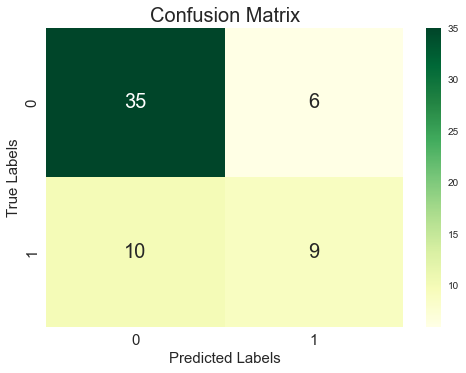

In [149]:

model_1_corr = confusion_matrix(y_test,y_preds)
sns.heatmap(model_1_corr,
           annot=True,
           cmap='YlGn',
           annot_kws={"size":20})
plt.title("Confusion Matrix",fontsize=20)
plt.xlabel("Predicted Labels",fontsize=15)
plt.ylabel("True Labels",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

###  **RandomForestClassifier**

In [150]:
# RandomForestClassifier
model_2 = RandomForestClassifier(random_state=42)

# Fit
model_2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [151]:
# y_preds
y_preds=model_2.predict(X_test)
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [152]:
# model_2_results
model_2_results = evaluate_preds(model=RandomForestClassifier(random_state=42),
                                X_train=X_train,
                                y_train=y_train,
                                X_test=X_test,
                                y_test=y_test,
                                y_preds=y_preds)
model_2_results

{'MCC': 0.5998858827434879,
 'F1_score': 0.7058823529411765,
 'Accuracy': 0.8333333333333334,
 'TPR': 0.779204107830552,
 'TNR': 0.779204107830552,
 'PR Auc': 0.7741228070175439,
 'ROC Curve': 0.8915275994865212}

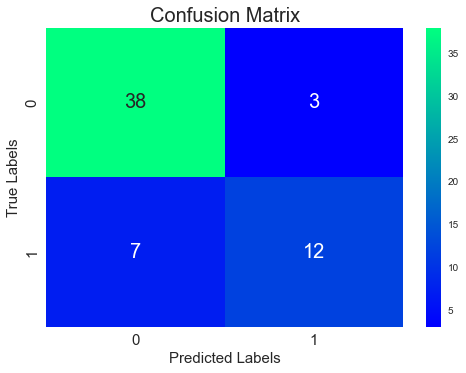

In [153]:
model_2_corr = confusion_matrix(y_test,y_preds)
sns.heatmap(model_2_corr,
           annot=True,
           cmap='winter',
           annot_kws={"size":20})
plt.title("Confusion Matrix",fontsize=20)
plt.xlabel("Predicted Labels",fontsize=15)
plt.ylabel("True Labels",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### **XGBoost**
    


In [154]:
model_3 = XGBClassifier(verbose=0)
# fit
model_3.fit(X_train,y_train)
# prediction
y_preds = model_3.predict(X_test)
y_preds

[09:34:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:34:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [155]:
# model_3_Resuts
model_3_results = evaluate_preds(model=XGBClassifier(random_state=42,verbose=0),
                                X_train=X_train,
                                y_train=y_train,
                                X_test=X_test,
                                y_test=y_test,
                                y_preds=y_preds)
model_3_results

[09:34:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:34:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'MCC': 0.5986330879328777,
 'F1_score': 0.6875,
 'Accuracy': 0.8333333333333334,
 'TPR': 0.7650834403080873,
 'TNR': 0.7650834403080873,
 'PR Auc': 0.7792172739541161,
 'ROC Curve': 0.8331193838254172}

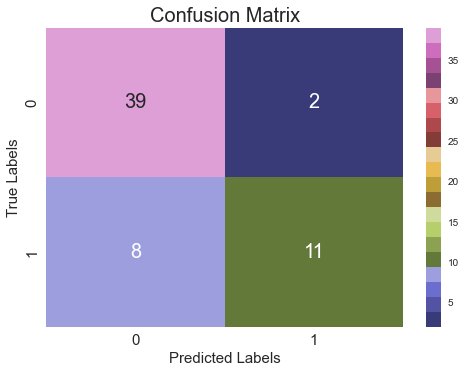

In [156]:
model_3_corr = confusion_matrix(y_test,y_preds)
sns.heatmap(model_3_corr,
           annot=True,
           cmap='tab20b',
           annot_kws={"size":20})
plt.title("Confusion Matrix",fontsize=20)
plt.xlabel("Predicted Labels",fontsize=15)
plt.ylabel("True Labels",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### **LogisticRegression**

In [157]:
# model_4
tf.random.set_seed(42)
model_4 = LogisticRegression()
# fit
model_4.fit(X_train,y_train)
# y_preds
y_preds = model_4.predict(X_test)
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [158]:
# model_4_results
model_4_results = evaluate_preds(model=LogisticRegression(random_state=42),
                                X_train=X_train,
                                y_train=y_train,
                                X_test=X_test,
                                y_test=y_test,
                                y_preds=y_preds)
model_4_results

{'MCC': 0.5986330879328777,
 'F1_score': 0.6875,
 'Accuracy': 0.8333333333333334,
 'TPR': 0.7650834403080873,
 'TNR': 0.7650834403080873,
 'PR Auc': 0.7792172739541161,
 'ROC Curve': 0.8562259306803595}

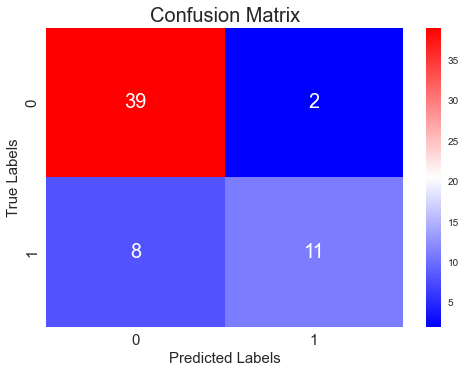

In [159]:
model_4_corr = confusion_matrix(y_test,y_preds)
sns.heatmap(model_4_corr,
           annot=True,
           cmap='bwr',
           annot_kws={"size":20})
plt.title("Confusion Matrix",fontsize=20)
plt.xlabel("Predicted Labels",fontsize=15)
plt.ylabel("True Labels",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## **SVM With Linear Kernel**

In [160]:
# model5
model_5 = SVC(kernel='linear')
# fit
model_5.fit(X_train,y_train)
# y_preds
y_preds = model_5.predict(X_test)
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [161]:
# model_5_results
model_5_results = evaluate_preds(model=SVC(random_state=42,kernel='linear',probability=True),
                                X_train=X_train,
                                y_train=y_train,
                                X_test=X_test,
                                y_test=y_test,
                                y_preds=y_preds)
model_5_results

{'MCC': 0.4182213306164359,
 'F1_score': 0.5333333333333333,
 'Accuracy': 0.7666666666666667,
 'TPR': 0.6739409499358151,
 'TNR': 0.6739409499358151,
 'PR Auc': 0.665829346092504,
 'ROC Curve': 0.8318356867779204}

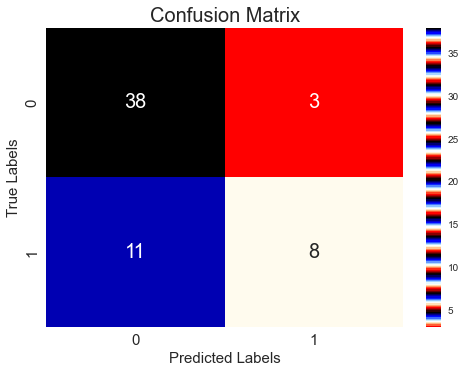

In [162]:
model_5_corr = confusion_matrix(y_test,y_preds)
sns.heatmap(model_5_corr,
           annot=True,
           cmap='flag',
           annot_kws={"size":20})
plt.title("Confusion Matrix",fontsize=20)
plt.xlabel("Predicted Labels",fontsize=15)
plt.ylabel("True Labels",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### SVM with Gaussian Kernel

In [163]:
# model_6
model_6 = SVC(kernel='rbf')
# fit
model_6.fit(X_train,y_train)
# y_preds
y_preds = model_6.predict(X_test)
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [164]:
# model_6_results 
model_6_results = evaluate_preds(model=SVC(random_state=42,kernel='rbf',probability=True),
                                X_train=X_train,
                                y_train=y_train,
                                X_test=X_test,
                                y_test=y_test,
                                y_preds=y_preds)
model_6_results

{'MCC': 0.0,
 'F1_score': 0.0,
 'Accuracy': 0.6833333333333333,
 'TPR': 0.5,
 'TNR': 0.5,
 'PR Auc': 0.6583333333333333,
 'ROC Curve': 0.4711168164313222}

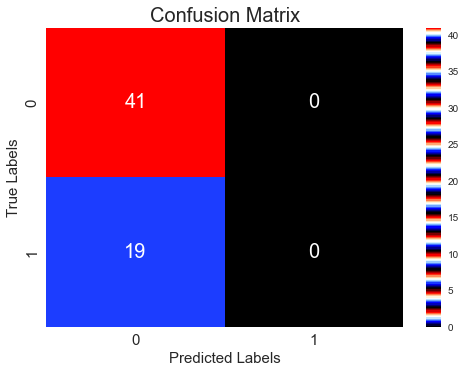

In [165]:
model_6_corr = confusion_matrix(y_test,y_preds)
sns.heatmap(model_6_corr,
           annot=True,
           cmap='flag_r',
           annot_kws={"size":20})
plt.title("Confusion Matrix",fontsize=20)
plt.xlabel("Predicted Labels",fontsize=15)
plt.ylabel("True Labels",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### **Naive Bayes**

In [166]:
# model_7
tf.random.set_seed(42)
model_7 = GaussianNB()
# Fit
model_7.fit(X_train,y_train)
# y_preds
y_preds = model_7.predict(X_test)
y_preds

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [167]:
# model_7_results
model_7_results = evaluate_preds(model=GaussianNB(),
                                X_train=X_train,
                                y_train=y_train,
                                X_test=X_test,
                                y_test=y_test,
                                y_preds=y_preds)
model_7_results

{'MCC': 0.36853106738124597,
 'F1_score': 0.48275862068965514,
 'Accuracy': 0.75,
 'TPR': 0.6476251604621309,
 'TNR': 0.6476251604621309,
 'PR Auc': 0.6342105263157893,
 'ROC Curve': 0.8562259306803595}

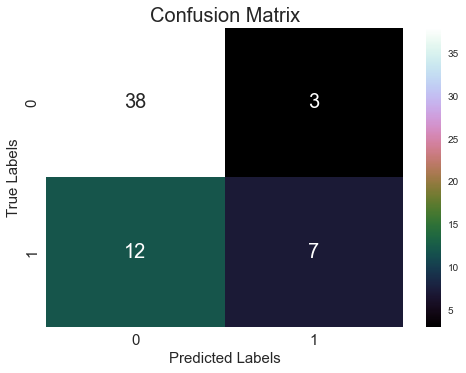

In [168]:
model_7_corr = confusion_matrix(y_test,y_preds)
sns.heatmap(model_7_corr,
           annot=True,
           cmap='cubehelix',
           annot_kws={"size":20})
plt.title("Confusion Matrix",fontsize=20)
plt.xlabel("Predicted Labels",fontsize=15)
plt.ylabel("True Labels",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### **KNN**

In [169]:
# model_8
tf.random.set_seed(42)
model_8 = KNeighborsClassifier()
# fit
model_8.fit(X_train,y_train)
# y_preds
y_preds = model_8.predict(X_test)
y_preds

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [170]:
# model_8_resutls
model_8_results = evaluate_preds(model=KNeighborsClassifier(),
                                X_train=X_train,
                                y_train=y_train,
                                X_test=X_test,
                                y_test=y_test,
                                y_preds=y_preds)
model_8_results

{'MCC': 0.08011544943070564,
 'F1_score': 0.27586206896551724,
 'Accuracy': 0.65,
 'TPR': 0.5320924261874198,
 'TNR': 0.5320924261874198,
 'PR Auc': 0.4302631578947368,
 'ROC Curve': 0.48587933247753534}

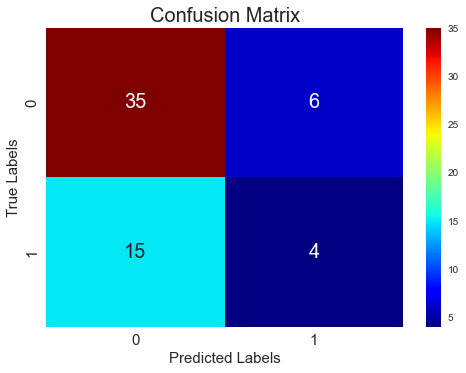

In [171]:
model_8_corr = confusion_matrix(y_test,y_preds)
sns.heatmap(model_8_corr,
           annot=True,
           cmap='jet',
           annot_kws={"size":20})
plt.title("Confusion Matrix",fontsize=20)
plt.xlabel("Predicted Labels",fontsize=15)
plt.ylabel("True Labels",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### **Artificial Neural Network**

In [172]:
# model_9
input_shape = (12,)
model_9 = Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1,activation='sigmoid')
])
# compile
model_9.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [173]:
# model_9_evaluate
model_9.fit(X_train,y_train,
            validation_data=(X_test,y_test),epochs=100)


Epoch 1/100
8/8 [==============================] - 2s 55ms/step - loss: 0.6648 - accuracy: 0.6653 - val_loss: 1.0432 - val_accuracy: 0.3333
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5930 - accuracy: 0.7657 - val_loss: 3.1163 - val_accuracy: 0.3167
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 0.5019 - accuracy: 0.7824 - val_loss: 2.2480 - val_accuracy: 0.3167
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 0.4150 - accuracy: 0.8285 - val_loss: 2.3101 - val_accuracy: 0.3167
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.3671 - accuracy: 0.8117 - val_loss: 1.2728 - val_accuracy: 0.3167
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 0.3388 - accuracy: 0.8661 - val_loss: 0.9903 - val_accuracy: 0.3167
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 0.3526 - accuracy: 0.8410 - val_loss: 1.0910 - val_accuracy: 0.3167
Epoch 8/100
8/8 [=======

8/8 [==============================] - 0s 11ms/step - loss: 0.1002 - accuracy: 0.9540 - val_loss: 0.9482 - val_accuracy: 0.7333
Epoch 60/100
8/8 [==============================] - 0s 11ms/step - loss: 0.1009 - accuracy: 0.9665 - val_loss: 0.9365 - val_accuracy: 0.7500
Epoch 61/100
8/8 [==============================] - 0s 10ms/step - loss: 0.1008 - accuracy: 0.9582 - val_loss: 0.9236 - val_accuracy: 0.7333
Epoch 62/100
8/8 [==============================] - 0s 10ms/step - loss: 0.1201 - accuracy: 0.9498 - val_loss: 0.9306 - val_accuracy: 0.7333
Epoch 63/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0909 - accuracy: 0.9623 - val_loss: 0.9418 - val_accuracy: 0.7333
Epoch 64/100
8/8 [==============================] - 0s 10ms/step - loss: 0.1111 - accuracy: 0.9456 - val_loss: 0.9206 - val_accuracy: 0.7500
Epoch 65/100
8/8 [==============================] - 0s 11ms/step - loss: 0.1089 - accuracy: 0.9665 - val_loss: 0.9062 - val_accuracy: 0.7333
Epoch 66/100
8/8 [========

In [174]:
# y_preds
y_pred_proba = model_9.predict(X_test)
y_preds = tf.squeeze(tf.round(y_pred_proba))
y_preds

<tf.Tensor: shape=(60,), dtype=float32, numpy=
array([0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 0.], dtype=float32)>

In [175]:
def evaluate_preds_nn(model,X_train, y_train,X_test,y_test,y_preds):
    """
    Returns all the evaluation metrics which are used in the paper
    
    """
    
    model = model.fit(X_train,y_train)
    # calculate accuracy_score
    accuracy = accuracy_score(y_test,y_preds)
    
    # matthews correlation coefficient
    mat_corrcoe = matthews_corrcoef(y_test,y_preds)
    
    # f1_score
    f1score = f1_score(y_test,y_preds)
    
    # precision_recall area under curve
    precision,recall,_ = precision_recall_curve(y_test,y_preds)
    precision_recall_auc = auc(recall,precision)
    
    # corr
    cm = confusion_matrix(y_test,y_preds)
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum()-(FP+FN+TP)
    # True Positive rate
    TPR = TP/(TP+FN)
    # True Negative rate
    TNR = TN/(TN+FP)

    
    fpr, tpr, _ = roc_curve(y_test,y_preds)
    
    roc_auc= roc_auc_score(y_test,y_preds)
    
    return  {"MCC"    : mat_corrcoe,
           "F1_score" : f1score,
           "Accuracy" : accuracy,
           "TPR"      : np.mean(TPR),
           "TNR"      : np.mean(TNR),
           "PR Auc"   : precision_recall_auc,
           "ROC Curve": roc_auc}
        

In [176]:
# model_9_results
model_9_results = evaluate_preds_nn(model=model_9,
                                X_train=X_train,
                                y_train=y_train,
                                X_test=X_test,
                                y_test=y_test,
                                y_preds=y_preds)
model_9_results

8/8 [==============================] - 0s 6ms/step - loss: 0.1019 - accuracy: 0.9498


{'MCC': 0.39970230490648306,
 'F1_score': 0.5714285714285714,
 'Accuracy': 0.75,
 'TPR': 0.689987163029525,
 'TNR': 0.689987163029525,
 'PR Auc': 0.6506578947368421,
 'ROC Curve': 0.6899871630295249}

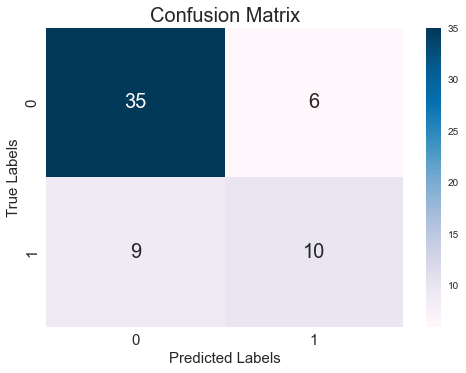

In [177]:
model_9_corr = confusion_matrix(y_test,y_preds)
sns.heatmap(model_9_corr,
           annot=True,
           cmap='PuBu',
           annot_kws={"size":20})
plt.title("Confusion Matrix",fontsize=20)
plt.xlabel("Predicted Labels",fontsize=15)
plt.ylabel("True Labels",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### **OneRuleClassifier**

In [178]:
# model 10
tf.random.set_seed(42)
model_10 = OneRClassifier()

#fit
X_train = X_train.values
y_train = y_train.values
model_10.fit(X_train,y_train)

OneRClassifier()

In [179]:
# y_preds
X_test = X_test.values
y_preds = model_10.predict(X_test)
y_preds

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [180]:
# model_10_results
tf.random.set_seed(42)
model_10_results = evaluate_preds_nn(model=OneRClassifier(),
                                X_train=X_train,
                                y_train=y_train,
                                X_test=X_test,
                                y_test=y_test,
                                y_preds=y_preds)
model_10_results

{'MCC': 0.10533190493018847,
 'F1_score': 0.17391304347826086,
 'Accuracy': 0.6833333333333333,
 'TPR': 0.5282413350449293,
 'TNR': 0.5282413350449293,
 'PR Auc': 0.4442982456140351,
 'ROC Curve': 0.5282413350449293}

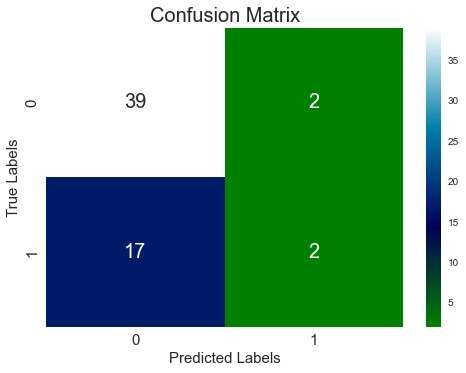

In [181]:
model_10_corr = confusion_matrix(y_test,y_preds)
sns.heatmap(model_10_corr,
           annot=True,
           cmap='ocean',
           annot_kws={"size":20})
plt.title("Confusion Matrix",fontsize=20)
plt.xlabel("Predicted Labels",fontsize=15)
plt.ylabel("True Labels",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [182]:
## All model evaluation metrics comparison
tf.random.set_seed(42)
model_results = pd.DataFrame({"DecisionTreeClassifier":model_1_results,
                             "RandomForestClassifier": model_2_results,
                             "XGBoost":model_3_results,
                             "Logistic Regression":model_4_results,
                             "SVM(Linear Kernel)":model_5_results,
                             "SVM(Gaussian Kernel)":model_6_results,
                             "Naive Bayes":model_7_results,
                             "KNearestNeighbors":model_8_results,
                             "ArtificialNeuralNetwork":model_9_results,
                             "OneRClassifier":model_10_results}).T
model_results

,MCC,F1_score,Accuracy,TPR,TNR,PR Auc,ROC Curve
DecisionTreeClassifier,0.351657,0.529412,0.733333,0.663671,0.663671,0.620175,0.663671
RandomForestClassifier,0.599886,0.705882,0.833333,0.779204,0.779204,0.774123,0.891528
XGBoost,0.598633,0.687500,0.833333,0.765083,0.765083,0.779217,0.833119
Logistic Regression,0.598633,0.687500,0.833333,0.765083,0.765083,0.779217,0.856226
SVM(Linear Kernel),0.418221,0.533333,0.766667,0.673941,0.673941,0.665829,0.831836
SVM(Gaussian Kernel),0.000000,0.000000,0.683333,0.500000,0.500000,0.658333,0.471117
Naive Bayes,0.368531,0.482759,0.750000,0.647625,0.647625,0.634211,0.856226
KNearestNeighbors,0.080115,0.275862,0.650000,0.532092,0.532092,0.430263,0.485879
ArtificialNeuralNetwork,0.399702,0.571429,0.750000,0.689987,0.689987,0.650658,0.689987
OneRClassifier,0.105332,0.173913,0.683333,0.528241,0.528241,0.444298,0.528241


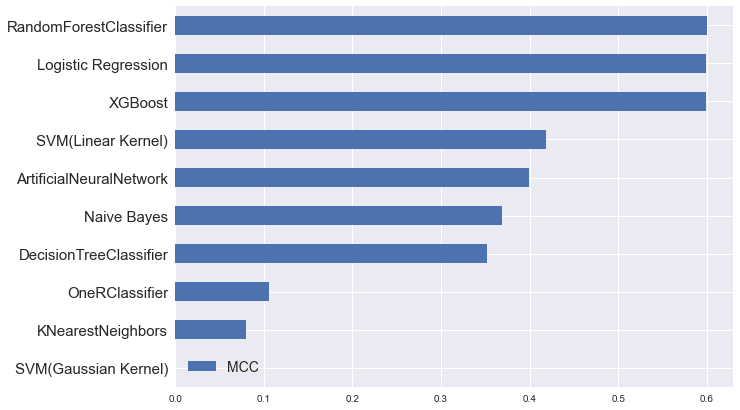

In [183]:
# Sort models by MatthewscorrelationCoefficient(MCC) and plot them
model_results[["MCC"]].sort_values(by="MCC").plot(figsize=(10,7),kind='barh')
plt.legend(fontsize=14)
plt.yticks(fontsize=15)
plt.show();

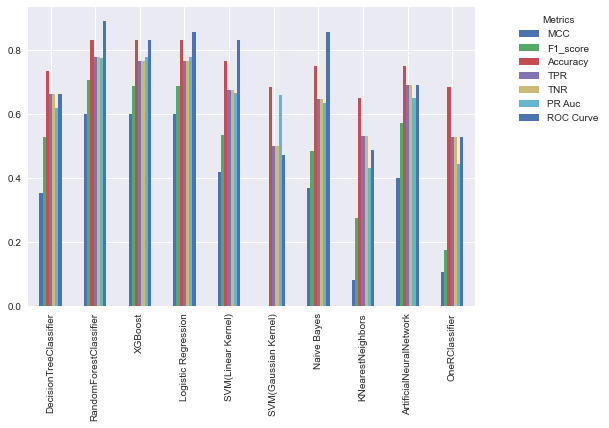

In [184]:
model_results.plot(kind='bar')
plt.legend(bbox_to_anchor=(1.08,1.0),title='Metrics',fontsize=10)

## **Feature Ranking**
For the feature ranking, two traditional approaches are used in the paper

1. **Biostatistics**.
2. **Machine Learning**.


1.  In **Biostatistics approach** three different approachs are used
* *Mann-Whitney U test*.
* *Pearson correlation coefficient*.
* *Chi Square test*.
* To compare the distribution of each feature between the two groups (survived individuals and dead    patients), plus the *Shapiro–Wilk test* to check the distribution of each feature.

2. **Machine Learning**

  In this approach, only **Random Forest** is used.

### Feature Ranking With Random Forest
Feature importance is another way of asking, "Which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our RandomForest model.

In [185]:
# model
model = RandomForestClassifier(n_estimators=10000,random_state=42,n_jobs=-1)

# fit
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=42)

In [186]:
#print the name and gini importance of each features
for feature in zip(df.columns,model.feature_importances_):
    print(feature)

('age', 0.07441141887635033)
('anaemia', 0.013753042993957803)
('creatinine_phosphokinase', 0.07711649390950762)
('diabetes', 0.01309907993041349)
('ejection_fraction', 0.13125294674109833)
('high_blood_pressure', 0.013732259553809729)
('platelets', 0.07798931742071989)
('serum_creatinine', 0.14908356500095482)
('serum_sodium', 0.06383486867800002)
('sex', 0.012093316542865712)
('smoking', 0.013558390604857338)
('time', 0.3600752997474648)


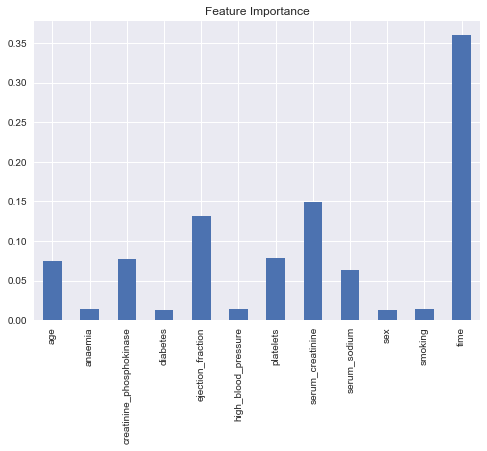

In [187]:
# # visualize feature importance
feature_dict = dict(zip(df.columns,list(model.feature_importances_)))
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

Here we can that see that `time`, `ejection_fraction`, `serum_creatinine` have more impact on `death_event`

In [188]:
# Identify and select most important features
sfm = SelectFromModel(model, threshold=0.15)

# Train the selector
sfm.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10000, n_jobs=-1,
                                                 random_state=42),
                threshold=0.15)

In [189]:
# Print the names of the most important feature
for feature_list_index in sfm.get_support(indices=True):
    print(df.columns[feature_list_index])

time


## Feature Ranking with Biostatistics
* Mann-Whitney U test.
* Pearson correlation coefficient.
* Chi Square test.
* To compare the distribution of each feature between the two groups (survived individuals and dead patients), plus the Shapiro–Wilk test to check the distribution of each feature.

**Pearson Correlation Coefficient.**

The Pearson correlation coefficient (or Pearson product-moment correlation coefficient, PCC) indicates the linear correlation between elements of two lists, showing the same elements
on different positions. The absolute value of PCC generates a high value (close to 1) if the elements of the two lists have linear correlation, and a low value (close to 0) otherwise.

In [190]:
serum_creatinine = pearsonr(df.serum_creatinine,df.DEATH_EVENT)
age = pearsonr(df.age, df.DEATH_EVENT)
anaemia = pearsonr(df.anaemia, df.DEATH_EVENT)
creatinine = pearsonr(df.creatinine_phosphokinase, df.DEATH_EVENT)
diabetes= pearsonr(df.diabetes,df.DEATH_EVENT)
ejection_fraction = pearsonr(df.ejection_fraction,df.DEATH_EVENT)
high_bp = pearsonr(df.high_blood_pressure, df.DEATH_EVENT)
plateles = pearsonr(df.platelets, df.DEATH_EVENT)
serum_sodium = pearsonr(df.serum_sodium, df.DEATH_EVENT)
sex = pearsonr(df.sex, df.DEATH_EVENT)
smoking = pearsonr(df.smoking, df.DEATH_EVENT)

pearsonr_correlation_coefficient = pd.DataFrame({"Serum creatinine":serum_creatinine[0],
                                                "Ejection fraction ": ejection_fraction[0],
                                                "Age": age[0],
                                                "Serum sodium":serum_sodium[0],
                                                "High blodd pressure":high_bp[0],
                                                "Anaemia":anaemia[0],
                                                "Creatinine phosphokinase":creatinine[0],
                                                "Plateles":plateles[0],
                                                "Smoking":smoking[0],
                                                "Sex":sex[0],
                                                "Diabetes":diabetes[0]},index=['PCC']).T

pearsonr_correlation_coefficient

,PCC
Serum creatinine,0.294278
Ejection fraction,-0.268603
Age,0.253729
Serum sodium,-0.195204
High blodd pressure,0.079351
Anaemia,0.066270
Creatinine phosphokinase,0.062728
Plateles,-0.049139
Smoking,-0.012623
Sex,-0.004316


The parameters taken by `pearsonr` are two, we have passed 0 index to different feature columns and 1 index is Death_event column

<AxesSubplot:>

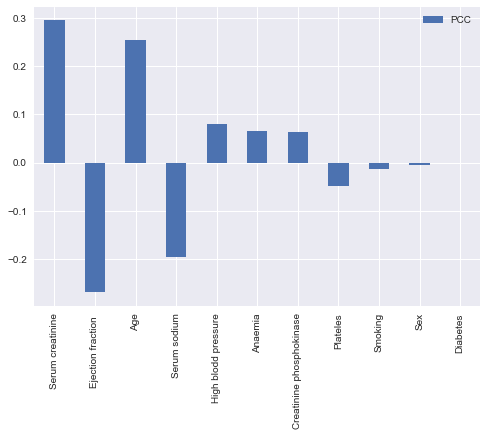

In [191]:
pearsonr_correlation_coefficient.plot(kind='bar')

**Chi-Square Test**


The chi square test (or χ2 test) between two features checks how likely an observed distribution is due to chance. A low p-value (close to 0) means that the two features have a strong relation; a high p-value (close to 1) means, instead, that the null hypothesis of independence cannot be discarded.

In [192]:
serum_creatinine = chisquare(df['serum_creatinine'])
age = chisquare(df['age'])
anaemia = chisquare(df['anaemia'])
creatinine = chisquare(df['creatinine_phosphokinase'])
diabetes= chisquare(df['diabetes'])
ejection_fraction = chisquare(df['ejection_fraction'])
high_bp = chisquare(df['high_blood_pressure'])
plateles = chisquare(df['platelets'])
serum_sodium = chisquare(df['serum_sodium'])
sex = chisquare(df['sex'])
smoking = chisquare(df['smoking'])

chisquare = pd.DataFrame({"Serum creatinine":serum_creatinine[1],
                                                "Ejection fraction ": ejection_fraction[1],
                                                "Age": age[1],
                                                "Serum sodium":serum_sodium[1],
                                                "High blodd pressure":high_bp[1],
                                                "Anaemia":anaemia[1],
                                                "Creatinine phosphokinase":creatinine[1],
                                                "Plateles":plateles[1],
                                                "Smoking":smoking[1],
                                                "Sex":sex[1],
                                                "Diabetes":diabetes[1]},index=['ChiSauare(p-value)']).T

chisquare

,ChiSauare(p-value)
Serum creatinine,9.988989e-01
Ejection fraction,1.196437e-91
Age,1.641847e-33
Serum sodium,1.000000e+00
High blodd pressure,9.999994e-01
Anaemia,1.000000e+00
Creatinine phosphokinase,0.000000e+00
Plateles,0.000000e+00
Smoking,9.999940e-01
Sex,1.000000e+00


<AxesSubplot:>

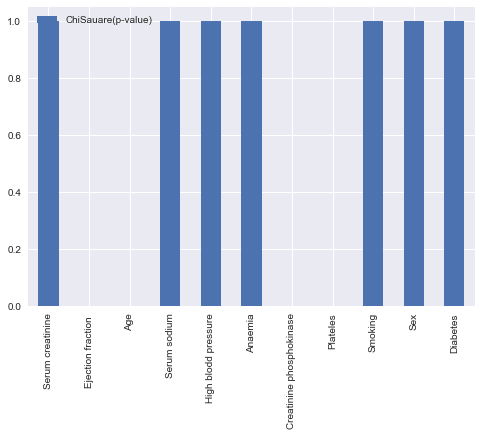

In [193]:
chisquare.plot(kind='bar')

**Shapiro**

The Shapiro–Wilk test to check the distribution of each feature (to assess if was feature was extracted from a normal distribution).

In [194]:
serum_creatinine = shapiro(df.serum_creatinine)
age = shapiro(df.age)
anaemia = shapiro(df.anaemia)
creatinine = shapiro(df.creatinine_phosphokinase)
diabetes= shapiro(df.diabetes)
ejection_fraction = shapiro(df.ejection_fraction)
high_bp = shapiro(df.high_blood_pressure)
plateles = shapiro(df.platelets)
serum_sodium = shapiro(df.serum_sodium)
sex = shapiro(df.sex)
smoking =shapiro(df.smoking)

shapiro = pd.DataFrame({"Serum creatinine":serum_creatinine[1],
                                                "Ejection fraction ": ejection_fraction[1],
                                                "Age": age[1],
                                                "Serum sodium":serum_sodium[1],
                                                "High blodd pressure":high_bp[1],
                                                "Anaemia":anaemia[1],
                                                "Creatinine phosphokinase":creatinine[1],
                                                "Plateles":plateles[1],
                                                "Smoking":smoking[1],
                                                "Sex":sex[1],
                                                "Diabetes":diabetes[1]},index=['Shapiro(p-value)']).T

shapiro

,Shapiro(p-value)
Serum creatinine,5.392758e-27
Ejection fraction,7.215433e-09
Age,5.350570e-05
Serum sodium,9.210248e-10
High blodd pressure,1.168618e-25
Anaemia,6.209964e-25
Creatinine phosphokinase,7.050336e-28
Plateles,2.883745e-12
Smoking,4.581843e-26
Sex,1.168500e-25


<AxesSubplot:>

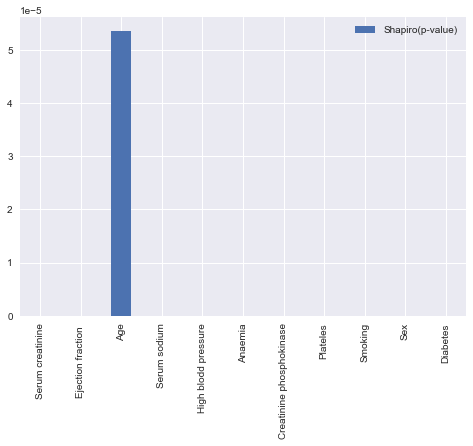

In [195]:
shapiro.plot(kind='bar')

**Mann-Whitney U Test**


The Mann–Whitney U test (or Wilcoxon rank–sum test), applied to each feature in relation to the death
event target, detects whether we can reject the null hypothesis that the distribution of the each feature for the groups of samples defined by death event are the same. A low p-value of this test (close to 0) means that the analyzed feature strongly relates to death event, while a high
p-value (close to 1) means the opposite

In [196]:
_,p_value = mannwhitneyu(df.age,df.DEATH_EVENT)
print('Age pvalue=%.6f' % (p_value))
_,p_value = mannwhitneyu(df.anaemia,df.DEATH_EVENT)
print('Anaemia pvalue=%.6f' % (p_value))
_,p_value = mannwhitneyu(df.creatinine_phosphokinase,df.DEATH_EVENT)
print('Creatinine_phosphokinase pvalue=%.6f' % (p_value))
_,p_value = mannwhitneyu(df.diabetes,df.DEATH_EVENT)
print('Diabetes pvalue=%.6f' % (p_value))
_,p_value = mannwhitneyu(df.ejection_fraction,df.DEATH_EVENT)
print('Ejection Fraction pvalue=%.6f' % (p_value))
_,p_value = mannwhitneyu(df.high_blood_pressure,df.DEATH_EVENT)
print('High Blood Pressure pvalue=%.6f' % (p_value))
_,p_value = mannwhitneyu(df.platelets,df.DEATH_EVENT)
print('Platelets pvalue=%.6f' % (p_value))
_,p_value = mannwhitneyu(df.serum_creatinine,df.DEATH_EVENT)
print('Serum Creatinine pvalue=%.6f' % (p_value))
_,p_value = mannwhitneyu(df.serum_sodium,df.DEATH_EVENT)
print('Serum Sodium pvalue=%.6f' % (p_value))
_,p_value = mannwhitneyu(df.sex,df.DEATH_EVENT)
print('Sex pvalue=%.6f' % (p_value))
_,p_value = mannwhitneyu(df.smoking,df.DEATH_EVENT)
print('Smoking pvalue=%.6f' % (p_value))

mann_whiteneyu = pd.DataFrame({"Serum Creatinine":0.000000,
                              "Ejection Fraction":0.000000,
                              "Age":0.000000,
                              "Serum Sodium":0.000000,
                              "Creatinine_phosphokinase":0.000000,
                              "Platelets":0.000000,
                              "Sex":0.000000,
                              "Anaemia":0.005386,
                              "Diabetes":0.014107,
                              "High Blood Pressure":0.436468,
                              "Smoking":1.000000}, index=['P-value']).T
mann_whiteneyu

Age pvalue=0.000000
Anaemia pvalue=0.005386
Creatinine_phosphokinase pvalue=0.000000
Diabetes pvalue=0.014107
Ejection Fraction pvalue=0.000000
High Blood Pressure pvalue=0.436468
Platelets pvalue=0.000000
Serum Creatinine pvalue=0.000000
Serum Sodium pvalue=0.000000
Sex pvalue=0.000000
Smoking pvalue=1.000000


,P-value
Serum Creatinine,0.000000
Ejection Fraction,0.000000
Age,0.000000
Serum Sodium,0.000000
Creatinine_phosphokinase,0.000000
Platelets,0.000000
Sex,0.000000
Anaemia,0.005386
Diabetes,0.014107
High Blood Pressure,0.436468


<AxesSubplot:>

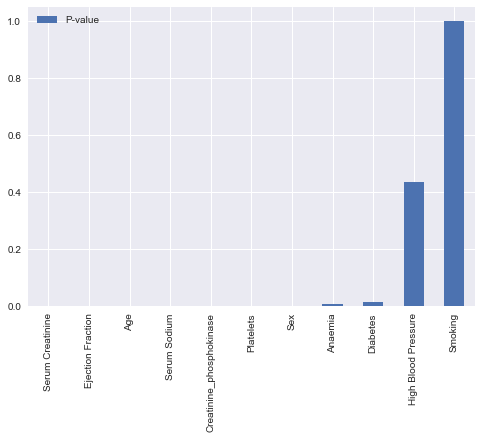

In [197]:
mann_whiteneyu.plot(kind='bar')

## Survival machine learning prediction on serum creatinine and ejection fraction alone

To investigate if machine learning can precisely predict  patients survival by using the top two ranked features alone. They therefore elaborated another computational pipeline with an initial phase of feature ranking, followed by a binary classification phase based on the top two features selected.

All the different methods employed for feature ranking identified serum creatinine and ejection fraction as the top two features.So we then performed a survival prediction on these two
features by employing three algorithms: 
* Random Forests
* Gradient Boosting 
* SVM radial.

In [198]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [199]:
X = df[['ejection_fraction','serum_creatinine']]
X.head()

,ejection_fraction,serum_creatinine
0,20,1.9
1,38,1.1
2,20,1.3
3,20,1.9
4,20,2.7


In [200]:
y = df['DEATH_EVENT']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [201]:
# Split into training and testing
X_train, X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

# check lengths
len(X_train), len(X_test),len(y_train),len(y_test)

(239, 60, 239, 60)

In [202]:
# Random Forest
model_1 = RandomForestClassifier(random_state=42)

# fit
model_1.fit(X_train,y_train)

# y_preds
y_preds = model_1.predict(X_test)
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [203]:
# model_1_resutls
model_1_results = evaluate_preds(model=RandomForestClassifier(random_state=42),
                                X_train=X_train,
                                y_train=y_train,
                                X_test=X_test,
                                y_test=y_test,
                                y_preds=y_preds)
model_1_results

{'MCC': 0.2866297455600075,
 'F1_score': 0.4516129032258065,
 'Accuracy': 0.7166666666666667,
 'TPR': 0.6232349165596919,
 'TNR': 0.6232349165596919,
 'PR Auc': 0.5758771929824562,
 'ROC Curve': 0.7195121951219512}

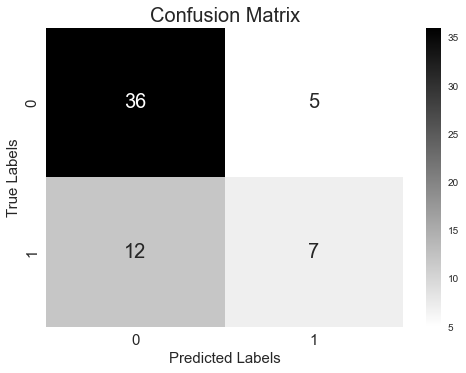

In [204]:
model_1_corr = confusion_matrix(y_test,y_preds)
sns.heatmap(model_1_corr,
           annot=True,
           cmap='binary',
           annot_kws={"size":20})
plt.title("Confusion Matrix",fontsize=20)
plt.xlabel("Predicted Labels",fontsize=15)
plt.ylabel("True Labels",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [205]:
# GradientBoost
model_2 = XGBClassifier(random_state=42,verbose=0)

# Fit
model_2.fit(X_train,y_train)

# y_preds
y_preds = model_2.predict(X_test)
y_preds

[09:42:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:42:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [206]:
# model_2_resutls
model_2_results = evaluate_preds(model=XGBClassifier(random_state=42,verbose=0),
                                X_train=X_train,
                                y_train=y_train,
                                X_test=X_test,
                                y_test=y_test,
                                y_preds=y_preds)
model_2_results

[09:42:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:42:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'MCC': 0.30213574647306635,
 'F1_score': 0.48484848484848486,
 'Accuracy': 0.7166666666666667,
 'TPR': 0.6373555840821565,
 'TNR': 0.6373555840821565,
 'PR Auc': 0.587907268170426,
 'ROC Curve': 0.7291399229781772}

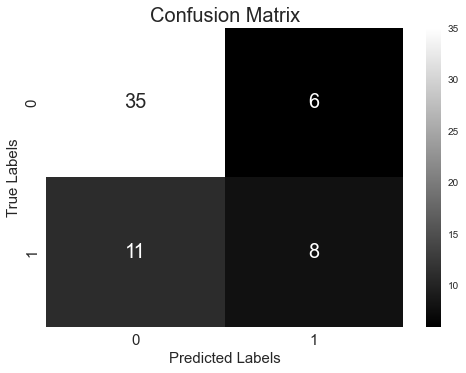

In [207]:
model_2_corr = confusion_matrix(y_test,y_preds)
sns.heatmap(model_2_corr,
           annot=True,
           cmap='binary_r',
           annot_kws={"size":20})
plt.title("Confusion Matrix",fontsize=20)
plt.xlabel("Predicted Labels",fontsize=15)
plt.ylabel("True Labels",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [208]:
# SVM
model_3 = SVC(random_state=42,kernel='rbf')

# fit
model_3.fit(X_train,y_train)

# y_preds
y_preds = model_3.predict(X_test)
y_preds

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [209]:
# model_3_results
model_3_results = evaluate_preds(model=SVC(kernel='rbf',random_state=42,probability=True),
                                X_train=X_train,
                                y_train=y_train,
                                X_test=X_test,
                                y_test=y_test,
                                y_preds=y_preds)
model_3_results

{'MCC': 0.19903437713058378,
 'F1_score': 0.3076923076923077,
 'Accuracy': 0.7,
 'TPR': 0.5686777920410784,
 'TNR': 0.5686777920410784,
 'PR Auc': 0.5159774436090225,
 'ROC Curve': 0.6514762516046213}

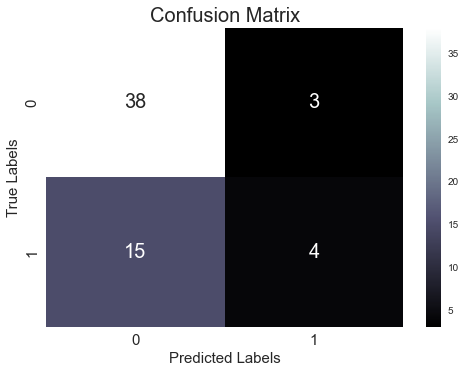

In [210]:
model_3_corr = confusion_matrix(y_test,y_preds)
sns.heatmap(model_3_corr,
           annot=True,
           cmap='bone',
           annot_kws={"size":20})
plt.title("Confusion Matrix",fontsize=20)
plt.xlabel("Predicted Labels",fontsize=15)
plt.ylabel("True Labels",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [211]:
# All results
model_results = pd.DataFrame({"RandomForestClassifier":model_1_results,
                             "XGBClassifier":model_2_results,
                             "SVM with Gaussian Kernel":model_3_results}).T
model_results

,MCC,F1_score,Accuracy,TPR,TNR,PR Auc,ROC Curve
RandomForestClassifier,0.286630,0.451613,0.716667,0.623235,0.623235,0.575877,0.719512
XGBClassifier,0.302136,0.484848,0.716667,0.637356,0.637356,0.587907,0.729140
SVM with Gaussian Kernel,0.199034,0.307692,0.700000,0.568678,0.568678,0.515977,0.651476


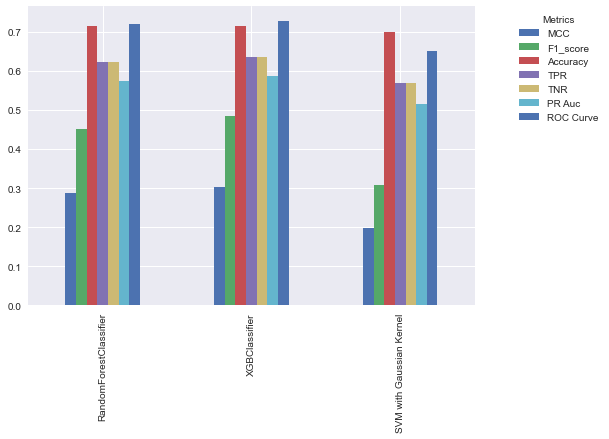

In [212]:
model_results.plot(kind='bar')
plt.legend(bbox_to_anchor=(1.08,1.0),title='Metrics',fontsize=10)